In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import  metrics  

In [13]:
train = pd.read_csv('../data/train.csv', index_col=0) 
print('train_data')
print(train)
train['location'] = [l.replace('location ', '') for l in train['location']]
train['location'] = train['location'].astype('int')

event_type = pd.read_csv('../data/event_type.csv', index_col=0)
severity_type = pd.read_csv('../data/severity_type.csv', index_col=0)
log_feature = pd.read_csv('../data/log_feature.csv', index_col=0)
resource_type = pd.read_csv('../data/resource_type.csv', index_col=0)

train_data
            location  fault_severity
id                                  
14121   location 118               1
9320     location 91               0
14394   location 152               1
8218    location 931               1
14804   location 120               0
...              ...             ...
870     location 167               0
18068   location 106               0
14111  location 1086               2
15189     location 7               0
17067   location 885               0

[7381 rows x 2 columns]


Text(0, 0.5, 'id')

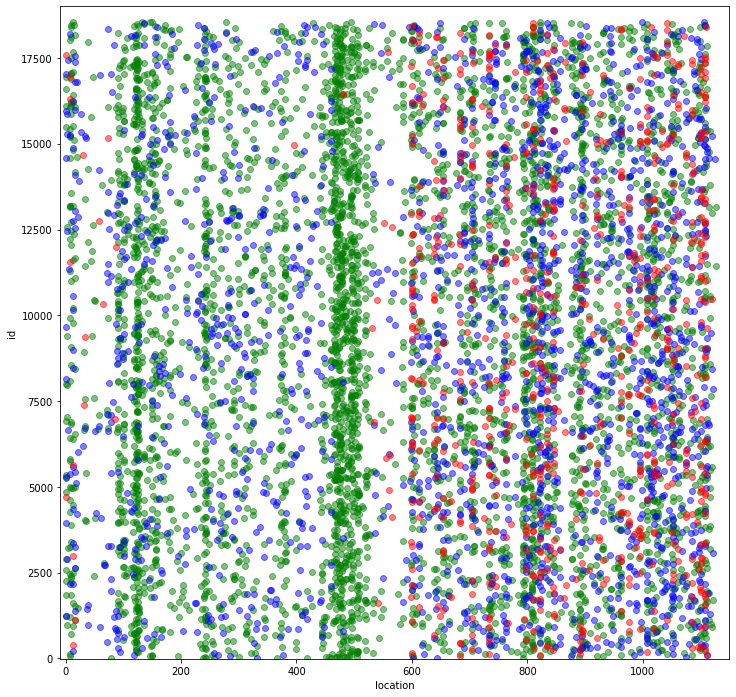

In [14]:
df = train
fig, ax = plt.subplots(figsize=(12,12))
#ax.scatter(df.loc[df.fault_severity.isnull(),'location'],df.loc[df.fault_severity.isnull()].index,alpha=0.5,color='k',s=2)
ax.scatter(df[df['fault_severity']==0]['location'],df[df['fault_severity']==0].index,alpha=0.5,color='g')
ax.scatter(df[df['fault_severity']==1]['location'],df[df['fault_severity']==1].index,alpha=0.5,color='b')
ax.scatter(df[df['fault_severity']==2]['location'],df[df['fault_severity']==2].index,alpha=0.5,color='r')
ax.set_xlim((-10,1150))
ax.set_ylim((-10,19000))
ax.set_xlabel('location')
ax.set_ylabel('id')

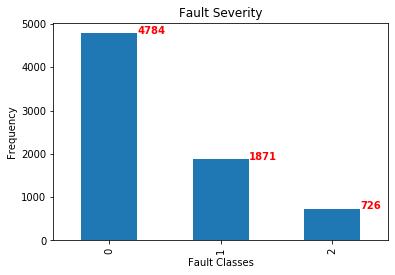

In [15]:
bplot_fault = train.fault_severity.value_counts().plot(kind= 'bar')
bplot_fault.set_title("Fault Severity")
bplot_fault.set_xlabel("Fault Classes")
bplot_fault.set_ylabel("Frequency")
for i, v in enumerate(train.fault_severity.value_counts()):
    bplot_fault.text(i + 0.25 , v ,str(v), color='red', fontweight='bold')

In [16]:
print (event_type.describe(include=['object']))  # event_type have been repeated , 53 unique event_type
print ('')
print(event_type.sort_values('id').head())
print ('')
print(log_feature.describe(include=['object']) )# log_feature have been repeated , 386 unique log_feature
print ('')
print(log_feature.sort_values('id').head())
print ('')
print (resource_type.describe(include=['object'])) # log_feature have been repeated , 386 unique log_feature
print ('')
print(resource_type.sort_values('id').head())
print ('')
print (severity_type.describe(include=['object'])) # log_feature have been repeated , 386 unique log_feature
print('')
print(severity_type.sort_values('id').head())

           event_type
count           31170
unique             53
top     event_type 11
freq             7888

       event_type
id               
1   event_type 11
1   event_type 13
2   event_type 35
2   event_type 34
3   event_type 11

        log_feature
count         58671
unique          386
top     feature 312
freq           5267

    log_feature  volume
id                     
1   feature 179       1
1    feature 68       2
1   feature 345       2
2   feature 312       1
2   feature 233       1

          resource_type
count             21076
unique               10
top     resource_type 8
freq              10268

      resource_type
id                 
1   resource_type 6
1   resource_type 8
2   resource_type 2
3   resource_type 8
4   resource_type 2

          severity_type
count             18552
unique                5
top     severity_type 2
freq               8737

      severity_type
id                 
1   severity_type 1
2   severity_type 2
3   severity_type 1
4   sever

In [17]:
df = train.join(event_type)
df
df['event_type'] = [l.replace('event_type ', '') for l in df['event_type']]
df['event_type'] = df['event_type'].astype('int')

Text(0, 0.5, 'id')

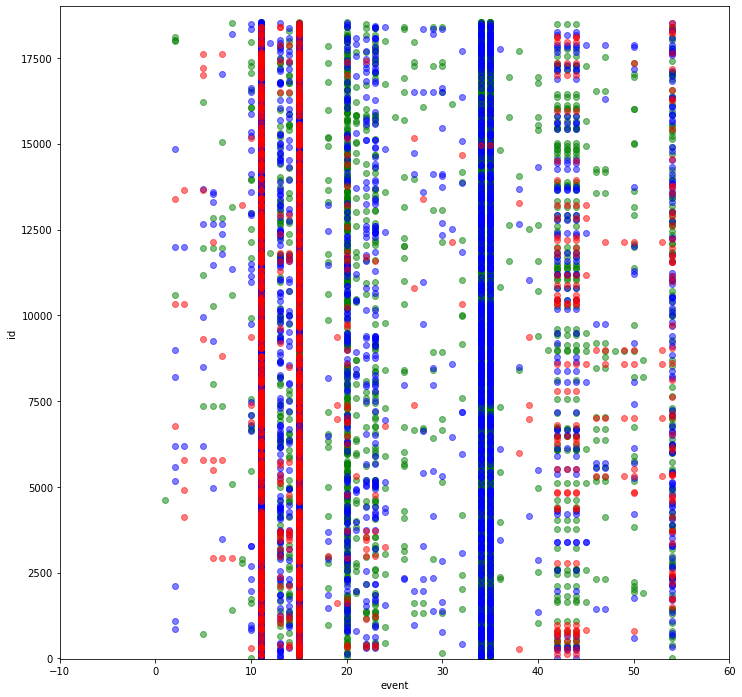

In [18]:
#df = train
fig, ax = plt.subplots(figsize=(12,12))
#ax.scatter(df.loc[df.fault_severity.isnull(),'location'],df.loc[df.fault_severity.isnull()].index,alpha=0.5,color='k',s=2)
ax.scatter(df[df['fault_severity']==0]['event_type'],df[df['fault_severity']==0].index,alpha=0.5,color='g')
ax.scatter(df[df['fault_severity']==1]['event_type'],df[df['fault_severity']==1].index,alpha=0.5,color='b')
ax.scatter(df[df['fault_severity']==2]['event_type'],df[df['fault_severity']==2].index,alpha=0.5,color='r')
ax.set_xlim((-10,60))
ax.set_ylim((-10,19000))
ax.set_xlabel('event')
ax.set_ylabel('id')

In [19]:
df = train.join(severity_type)
df
df['severity_type'] = [l.replace('severity_type ', '') for l in df['severity_type']]
df['severity_type'] = df['severity_type'].astype('int')

Text(0, 0.5, 'id')

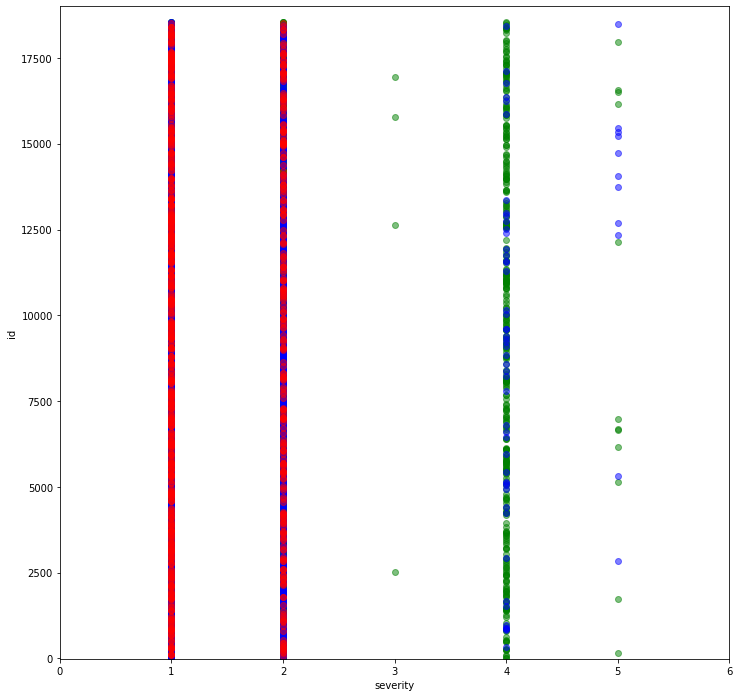

In [20]:
#df = train
fig, ax = plt.subplots(figsize=(12,12))
#ax.scatter(df.loc[df.fault_severity.isnull(),'location'],df.loc[df.fault_severity.isnull()].index,alpha=0.5,color='k',s=2)
ax.scatter(df[df['fault_severity']==0]['severity_type'],df[df['fault_severity']==0].index,alpha=0.5,color='g')
ax.scatter(df[df['fault_severity']==1]['severity_type'],df[df['fault_severity']==1].index,alpha=0.5,color='b')
ax.scatter(df[df['fault_severity']==2]['severity_type'],df[df['fault_severity']==2].index,alpha=0.5,color='r')
ax.set_xlim((0,6))
ax.set_ylim((-10,19000))
ax.set_xlabel('severity')
ax.set_ylabel('id')

In [21]:
df = train.join(resource_type)
df
df['resource_type'] = [l.replace('resource_type ', '') for l in df['resource_type']]
df['resource_type'] = df['resource_type'].astype('int')

Text(0, 0.5, 'id')

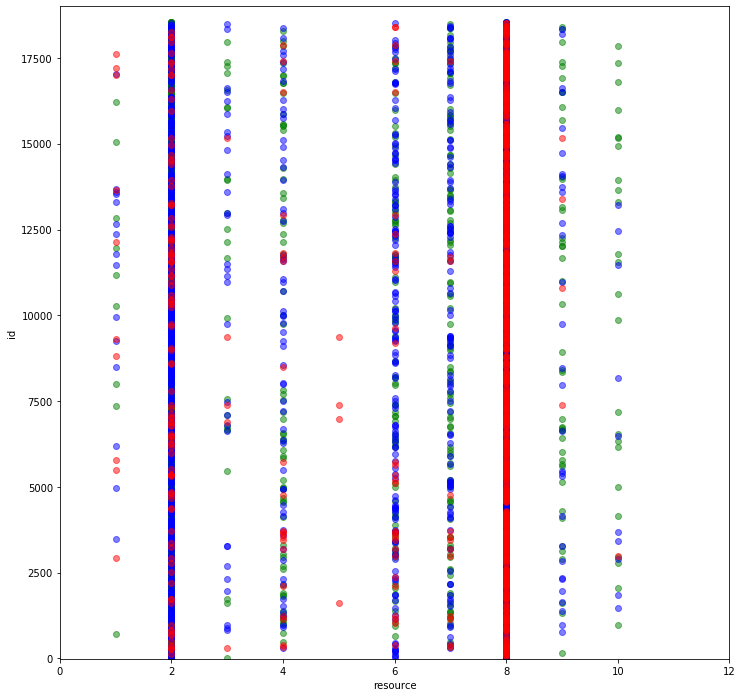

In [22]:
#df = train
fig, ax = plt.subplots(figsize=(12,12))
#ax.scatter(df.loc[df.fault_severity.isnull(),'location'],df.loc[df.fault_severity.isnull()].index,alpha=0.5,color='k',s=2)
ax.scatter(df[df['fault_severity']==0]['resource_type'],df[df['fault_severity']==0].index,alpha=0.5,color='g')
ax.scatter(df[df['fault_severity']==1]['resource_type'],df[df['fault_severity']==1].index,alpha=0.5,color='b')
ax.scatter(df[df['fault_severity']==2]['resource_type'],df[df['fault_severity']==2].index,alpha=0.5,color='r')
ax.set_xlim((0,12))
ax.set_ylim((-10,19000))
ax.set_xlabel('resource')
ax.set_ylabel('id')

In [23]:
df = train.join(log_feature)
df
df['log_feature'] = [l.replace('feature ', '') for l in df['log_feature']]
df['log_feature'] = df['log_feature'].astype('int')

Text(0, 0.5, 'id')

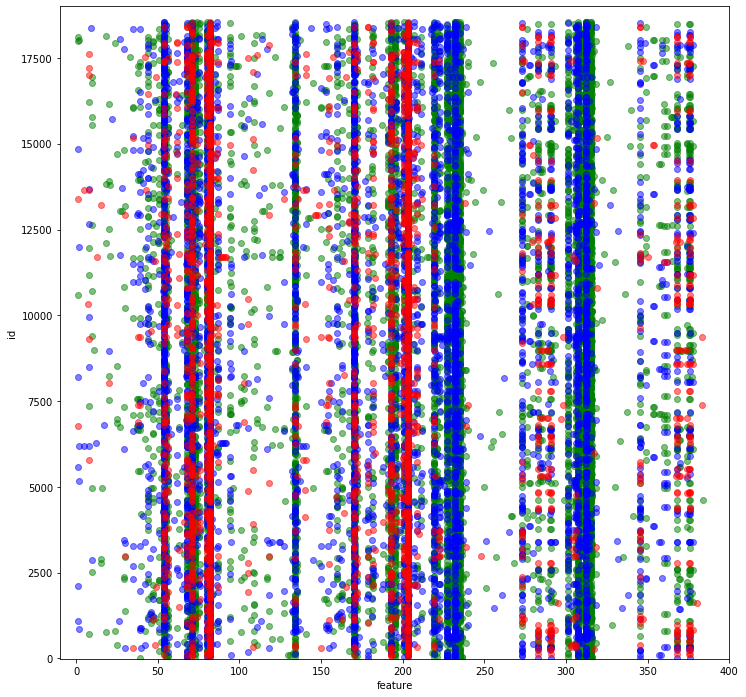

In [24]:
#df = train
fig, ax = plt.subplots(figsize=(12,12))
#ax.scatter(df.loc[df.fault_severity.isnull(),'location'],df.loc[df.fault_severity.isnull()].index,alpha=0.5,color='k',s=2)
ax.scatter(df[df['fault_severity']==0]['log_feature'],df[df['fault_severity']==0].index,alpha=0.5,color='g')
ax.scatter(df[df['fault_severity']==1]['log_feature'],df[df['fault_severity']==1].index,alpha=0.5,color='b')
ax.scatter(df[df['fault_severity']==2]['log_feature'],df[df['fault_severity']==2].index,alpha=0.5,color='r')
ax.set_xlim((-10,400))
ax.set_ylim((-10,19000))
ax.set_xlabel('feature')
ax.set_ylabel('id')